# Investigating Fandago Movie Ratings

## Introduction
> Fandango is an American ticketing company that sells movie tickets via their website as well as through their mobile app. They are also a provider of television and streaming media information, displaying ratings for movies on their website. In 2015, Fandango was under investigation for inflating their ratings for movies. It was reported that movies were being rounded up to the nearest half-point. In the movie industry, half a point holds significant value, especially when the rating is out of 5. Fandango reacted to these accusations and blamed a bug for the inflation in ratings and have said that such a bug was fixed and that present ratings are more honest. In this project, we will investigate whether or not Fandango has adjusted its rating process for popular movies by analyzing movie rating data between the years 2015 and 2016. The aim of this project is to be able to sample the correct data and compare frequency distributions between samples. The first part of this notebook will focus on preparing the data and selecting the samples. The second section will focus on analyzing the data and comparing frequency distributions between the samples.

In [1]:
# Importing the libraries
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.gridspec as gs
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import math
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading in the data
before = pd.read_csv("/Users/omarstinner/Data Files/Python Projects/Files/Guided Project - Investigating Fandago Movie Ratings/fandango_score_comparison.csv")
after = pd.read_csv("/Users/omarstinner/Data Files/Python Projects/Files/Guided Project - Investigating Fandago Movie Ratings/movie_ratings_16_17.csv")

In [3]:
# Exploring the data
display(before.head())
display(before.info())
display(after.head())
display(after.info())

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

None

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie         214 non-null    object 
 1   year          214 non-null    int64  
 2   metascore     214 non-null    int64  
 3   imdb          214 non-null    float64
 4   tmeter        214 non-null    int64  
 5   audience      214 non-null    int64  
 6   fandango      214 non-null    float64
 7   n_metascore   214 non-null    float64
 8   n_imdb        214 non-null    float64
 9   n_tmeter      214 non-null    float64
 10  n_audience    214 non-null    float64
 11  nr_metascore  214 non-null    float64
 12  nr_imdb       214 non-null    float64
 13  nr_tmeter     214 non-null    float64
 14  nr_audience   214 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


None

> Looking at a brief summary of the "before" dataset, we can see that there are no null values in the entire dataset. All the variables seem to have been assigned the correct data types. Structurally, the dataset is sound and shows no signs of needed cleaning. However, we do see that there are many variables that do not pertain to the question we are exploring. Both datasets contain data from other online movie databases such as "IMDb", "Rotten Tomatoes", and "Metacritic". For this reason, we will only be selecting the following relevant columns for our "Fandango" analysis: "FILM", "Fandango_Stars", "Fandango_Ratingvalue", "Fandango_votes", and "Fandango_Difference" from the before dataset. From the "after" dataset we will be selecting: "movie", "year", "fandango". As we saw in the "before" dataset, the "after" dataset also does not have any null values and has the correct datatypes assigned to its variables.

## Part 1: Preparing The Data

In [4]:
# Slicing for relevant columns

before_fandango = before[["FILM", "Fandango_Stars", "Fandango_Ratingvalue", "Fandango_votes", "Fandango_Difference"]]
after_fandango = after[["movie", "year", "fandango"]]

In [5]:
# Checking if our datasets meets our first sampling criteria - the movies in our analysis are popular

# Determining if the "after" sample has popular movies
print(before_fandango[before_fandango["Fandango_votes"] < 30].shape[0])

# Determining if the "after" sample has popular movies
display(after_fandango.sample(10, random_state = 0))

pd.DataFrame({"movie" : ["The Take (Bastille Day)",
                        "Come and Find Me",
                        "Kickboxer",
                        "The Founder",
                        "The Darkness",
                        "Ice Age: Collision Course",
                        "Lion",
                        "Ride Along 2",
                        "A Monster Calls",
                        "Jane Got a Gun"] ,
            "num_votes" : [80,
                           14,
                           34,
                           244,
                           34,
                           121,
                           267,
                           121,
                           267,
                           82]})


0


,movie,year,fandango
197,The Take (Bastille Day),2016,4.0
37,Come and Find Me,2016,4.0
89,Kickboxer,2016,4.0
176,The Founder,2016,4.0
170,The Darkness,2016,2.5
75,Ice Age: Collision Course,2016,4.0
96,Lion,2016,4.0
137,Ride Along 2,2016,4.0
5,A Monster Calls,2016,4.0
83,Jane Got a Gun,2016,3.5


,movie,num_votes
0,The Take (Bastille Day),80
1,Come and Find Me,14
2,Kickboxer,34
3,The Founder,244
4,The Darkness,34
5,Ice Age: Collision Course,121
6,Lion,267
7,Ride Along 2,121
8,A Monster Calls,267
9,Jane Got a Gun,82


> Our sampling criteria are 1. The movies have to be popular(30 or more ratings), 2. The movies have to be made in 2015(for the "before" dataset) and 2016(for the "after" dataset). We can see that none of the movies in the "before" dataset are not popular as none have a number of votes below 30. Unfortunately, the "after" dataset, does not have a column showing the number of votes each movie received, which means that we will have to manually fetch such data. Realistically, we will not be able to manually fetch the number of votes for each movie. In this situation we will have to sample a number of movies (10), find the number of votes they each received, and use it to represent the "after" dataset as a whole. After generating a sample of 10 movies, we see that 90% of the movies are considered popular as the majority of the movies (9/10 movies) have 30 or more reviews. We consider this as representative of the population (the "before" dataset) and assume that the "before" dataset mostly contains popular movies. With this information, we can confidently proceed with our analysis.

In [6]:
# Selecting movies made in 2015 and 2016

# Selecting on movies made in 2015 from the "before" dataset
before_fandango["Year"] = before_fandango["FILM"].str[-5: -1].astype(int)
movies_2015 = before_fandango[before_fandango["Year"] == 2015]

# Selecting on movies made in 2016 from the "after" dataset
movies_2016 = after_fandango[after_fandango["year"] == 2016]

## Part 2: Analyzing The Data

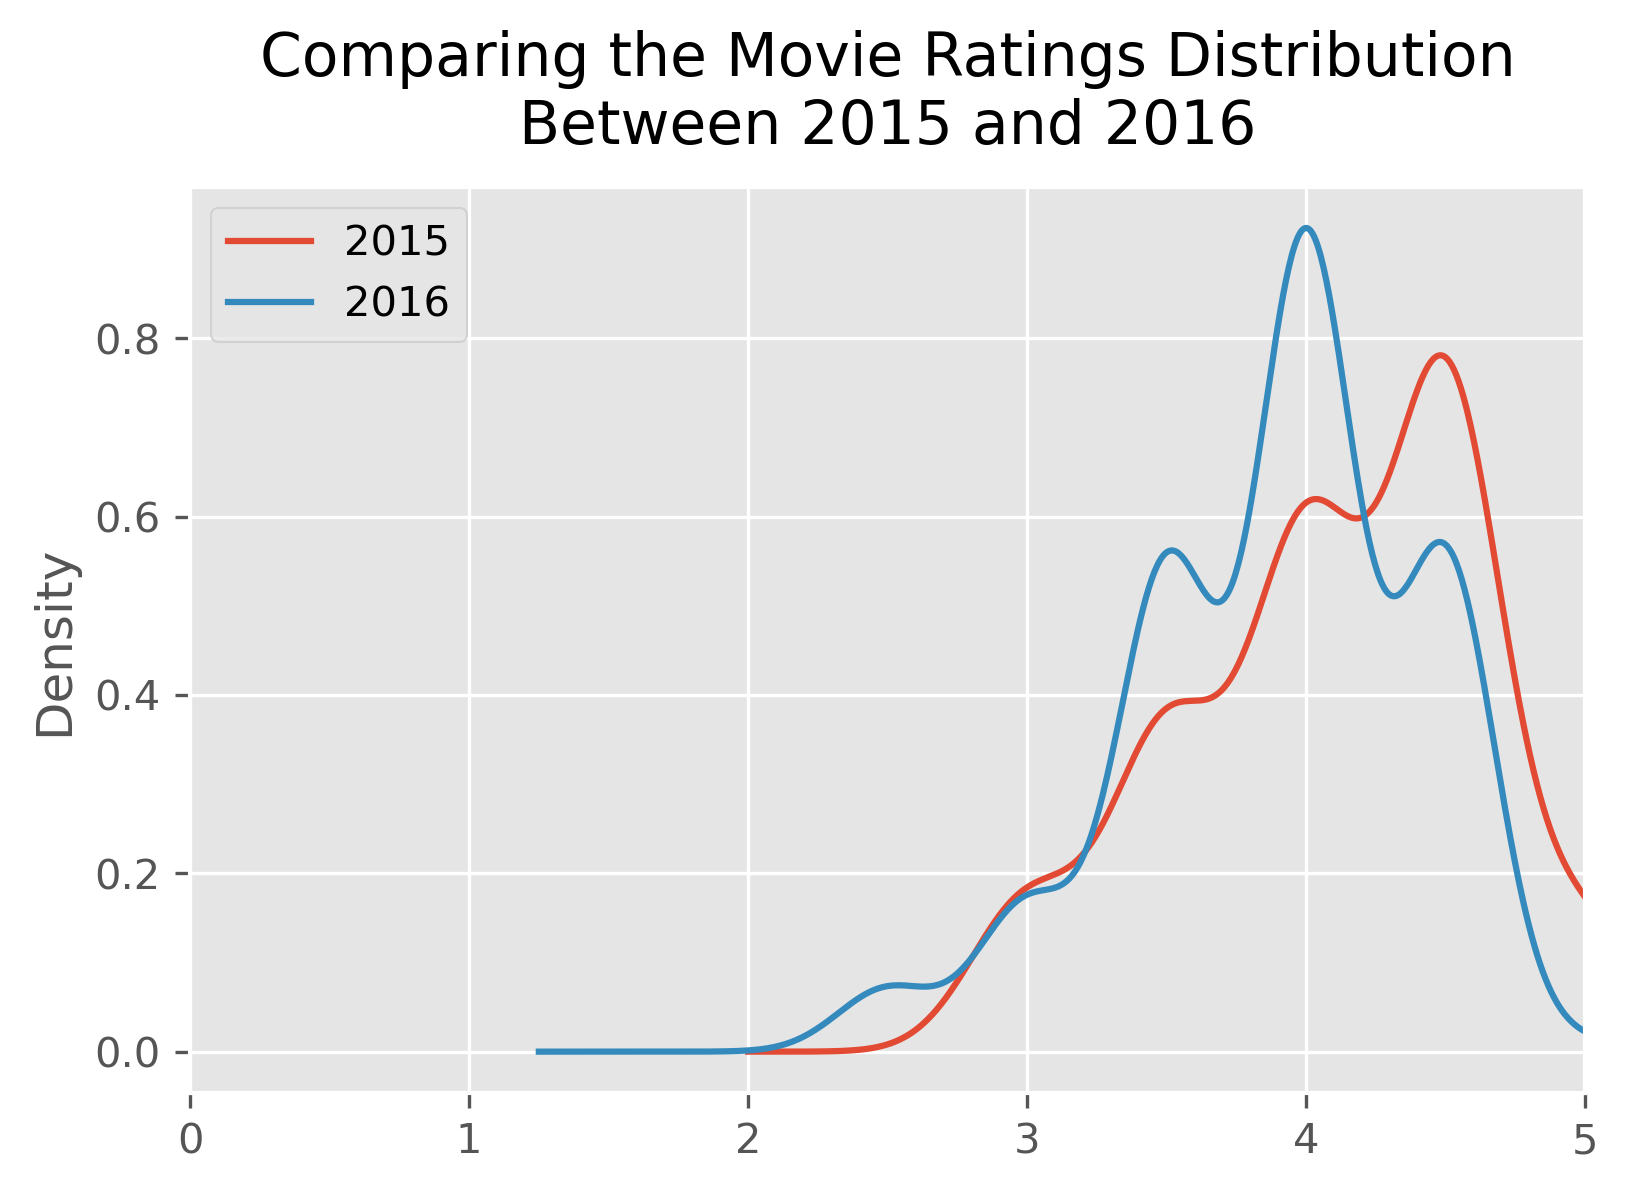

2015


,Fandango_Stars
3.0,8.527132
3.5,17.829457
4.0,28.682171
4.5,37.984496
5.0,6.976744


2016


,fandango
2.5,3.141361
3.0,7.329843
3.5,24.083770
4.0,40.314136
4.5,24.607330
5.0,0.523560


In [7]:
# Comparing distrubtion Shapes for 2015 and 2016
style.use("ggplot")
movies_2015["Fandango_Stars"].plot.kde(label = "2015", legend = True)
movies_2016["fandango"].plot.kde(label = "2016", legend = True)
plt.title("Comparing the Movie Ratings Distribution\nBetween 2015 and 2016", y = 1.02)
plt.legend()
plt.xlim([0, 5])
plt.show()

# Analyzing more granular information regarding the movie ratings
print("2015")
display(pd.DataFrame(movies_2015["Fandango_Stars"].value_counts(normalize = True).sort_index() * 100))
print("2016")
pd.DataFrame(movies_2016["fandango"].value_counts(normalize = True).sort_index() * 100)

> We observe that throughout both years, the ratings are heavily negatively skewed. It seems like Fandango has a tendency to rate their movies quite highly, as the majority of their movies are all within ratings between 3.5 and 5. These findings seem reasonable as Fandango is also a website that sells tickets, meaning that rating movies highly is a way for Fandango to promote the movie and sell more tickets. We can see that in fact in 2016 some movies received ratings below 2 - a rating that was not seen amongst movies in 2015. This suggests that 2015 was in fact a year of Fandango movie inflation. Looking further to the right of the graph, we see that the majority of movies in 2016 were rated 4 Fandango stars as compared to the year 2015, where the majority of ratings were around 4.5, further confirming the notion that in 2015 movie ratings were inflated. looking at the more granular statistics, we see that in 2016 that there were significantly fewer movies that received a Fandango movie rating of 5. Only ~0.5% of movies received a rating of 5. This is around a 6.5% decrease from 2015. We see this same trend for movies that received a rating of 4.5. "Only" 24% of movies in 2016 received a rating of 4,5, while 37% of movies in 2015 received the same rating - that is around 13% more. We also see movies that received a rating below 3 make an appearance in 2016. Although they only made up around 3% of the movie count, they were present and this is a sign of less inflation when compared to 2015 where they had no movies drop below a rating of 3. Lastly, We do see that 2016 had a very high proportion of its movies receive a rating of 4 (40%) as compared to 2015 where 28% of movies received the same rating.

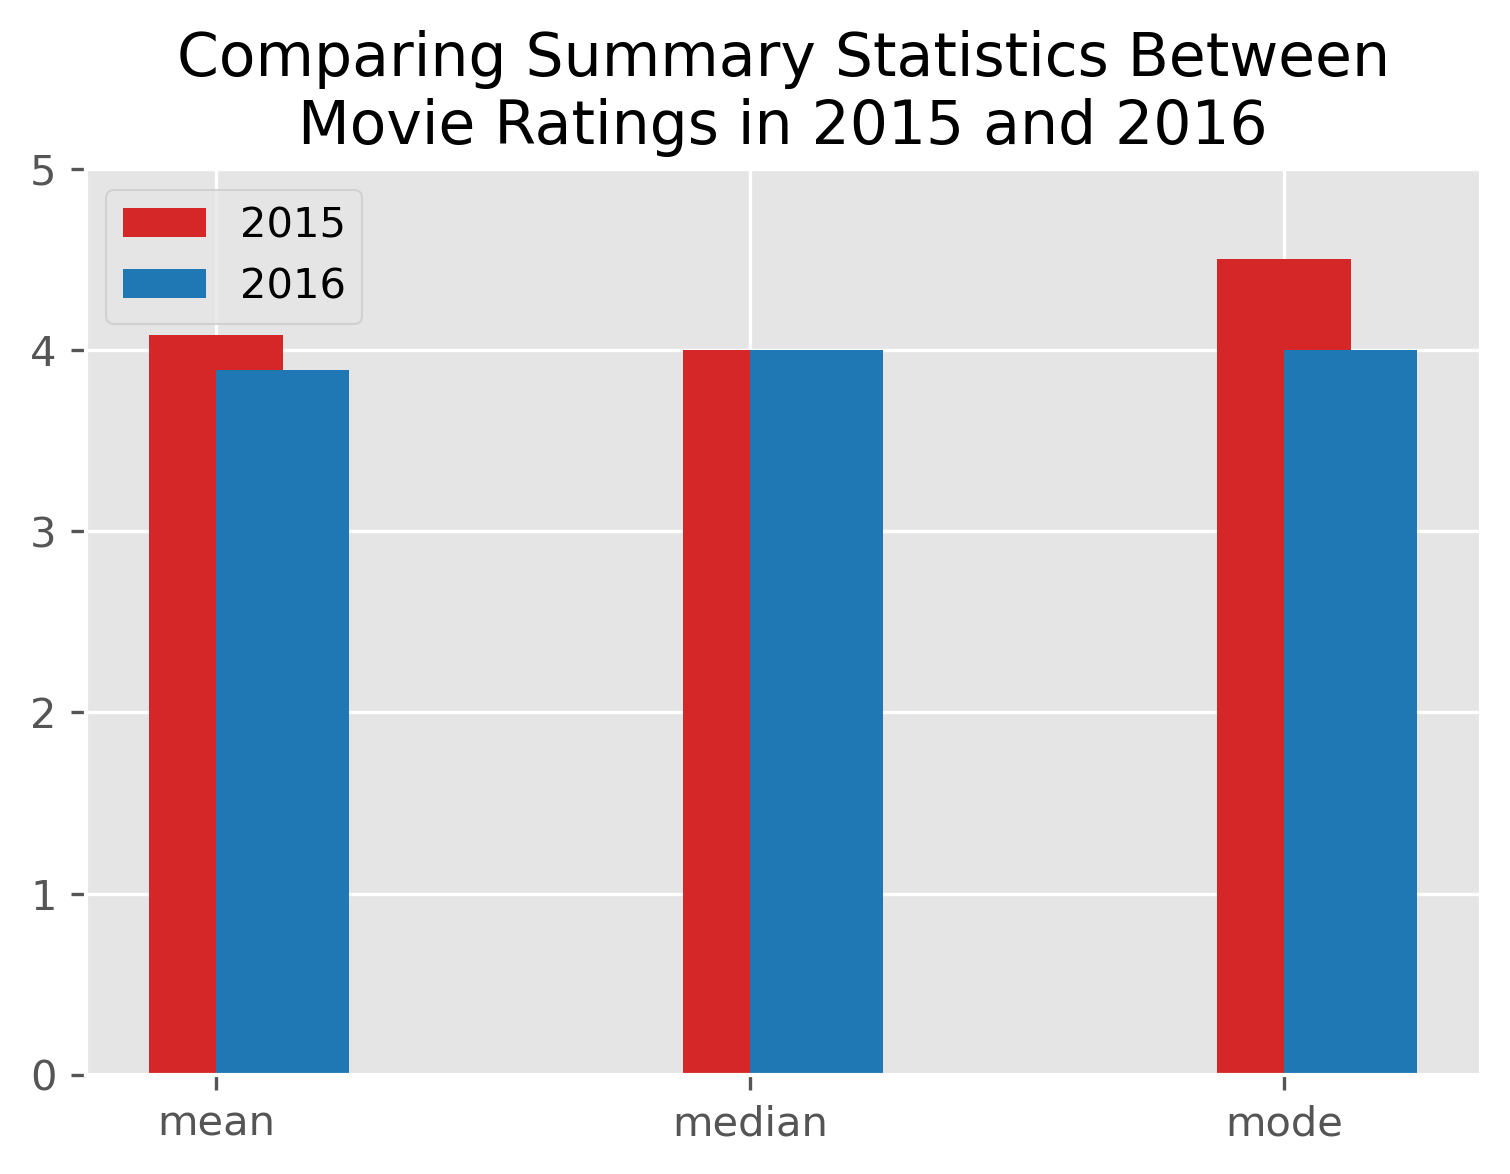

In [8]:
# Looking at the mean, median, mode for moving ratings in each year

# Calculating Statistics for 2015
mean_2015 = movies_2015["Fandango_Stars"].mean()
median_2015 = movies_2015["Fandango_Stars"].median()
mode_2015 = movies_2015["Fandango_Stars"].mode()

# Calculating Statistics for 2016
mean_2016 = movies_2016["fandango"].mean()
median_2016 = movies_2016["fandango"].median()
mode_2016 = movies_2016["fandango"].mode()

summary_stats = pd.DataFrame()
summary_stats["2015"] = [mean_2015, median_2015, mode_2015]
summary_stats["2016"] = [mean_2016, median_2016, mode_2016]
summary_stats.index = ["mean", "median", "mode"]

# Plotting the summary Statistics
plt.bar(summary_stats.index, summary_stats["2015"], align = "center", label = "2015", color = "tab:red", width = 0.25)
plt.bar(summary_stats.index, summary_stats["2016"], align = "edge", label = "2016", color = "tab:blue", width = 0.25)
plt.title("Comparing Summary Statistics Between\nMovie Ratings in 2015 and 2016")
plt.ylim([0, 5])
plt.legend()
plt.show()

> We observe that our findings have remained consistent with the idea that movie ratings have dropped in 2016 compared to 2015, indicating a decrease in Fandango movie inflation. We can see that the average movie rating is below 4 in 2016, while it is above 4 in 2015. The most common rating in 2015 was a rating of 4.5 and a rating of 4 in 2016. Only the median remained the same.

## Conclusion
> After analyzing the distributions between the two samples, analyzing the relative frequencies of each sample in terms of ratings, and looking at some summary statistics, we can indeed conclude that Fandango has fixed their so-called "bug". We see that on average, the ratings have gone down. There are significant proportional differences in movie ratings between 2015 and 2016. Most notably, in 2016 only 0.5% of movies received a 5-star rating and 24% of movies received a rating of 4.5.

In [9]:
%%html
<style>
.nbviewer div.output_area {
  overflow-y: auto;
  max-height: 400px;
}
</style>